In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [12]:
# Read the CSV file
df_tms = pd.read_csv("TMS远程监管700008.csv", encoding="utf-8")  # assuming the file is encoded in UTF-8
df_Xiamen = pd.read_csv("new_onlyXiamen_addcode.csv", encoding="utf-8")

In [14]:
# Filter columns
df_tms = df_tms[['ROUTEID', 'TRANSID','CREDATE','SENDPOS', 'DISPATCHDATE', 'SIGNDATE']]
# Drop NA
df_tms = df_tms.dropna(subset=['CREDATE'])
# Acquire duration time
df_tms['CREDATE'] = pd.to_datetime(df_tms['CREDATE'], format='%Y/%m/%d %H:%M:%S')
# Extract the date from the 'SIGNDATE' column and create a new 'DATE' column
df_tms['DATE'] = df_tms['CREDATE'].dt.date
# Merge df_Xiamen with df_tms to filter all the trans in Xiamen
merged_df = df_tms.merge(df_Xiamen[['TransID','Xiamen.经度', 'Xiamen.纬度', 'combine']], left_on='TRANSID', right_on='TransID', how='inner')
merged_df.drop(columns=['TransID'], inplace=True)
merged_df

,ROUTEID,TRANSID,CREDATE,SENDPOS,DISPATCHDATE,SIGNDATE,DATE,Xiamen.经度,Xiamen.纬度,combine
0,11,2242363.0,2023-05-24 11:23:21,1（燕来福）厦门鹭燕海峡两岸药材贸易有限公司,NaN,NaN,2023-05-24,118.003375,24.599205,"118.003375,24.599205"
1,11,2242363.0,2023-06-05 12:09:58,1（燕来福）厦门鹭燕海峡两岸药材贸易有限公司,NaN,NaN,2023-06-05,118.003375,24.599205,"118.003375,24.599205"
2,11,2242363.0,2023-06-08 16:38:37,1（燕来福）厦门鹭燕海峡两岸药材贸易有限公司,NaN,NaN,2023-06-08,118.003375,24.599205,"118.003375,24.599205"
3,11,2242363.0,2023-08-02 11:08:37,1（燕来福）厦门鹭燕海峡两岸药材贸易有限公司,NaN,NaN,2023-08-02,118.003375,24.599205,"118.003375,24.599205"
4,11,2242363.0,2023-05-12 18:40:50,1（燕来福）厦门鹭燕海峡两岸药材贸易有限公司,NaN,NaN,2023-05-12,118.003375,24.599205,"118.003375,24.599205"
...,...,...,...,...,...,...,...,...,...,...
79140,0,3404242.0,2023-05-29 16:56:07,厦门海沧森东康内科诊所,2023/5/30 7:39:14,2023/5/30 11:29:36,2023-05-29,117.962617,24.530733,"117.962617,24.530733"
79141,7,2088940.0,2023-06-30 16:00:47,厦门湖里青湖门诊部有限公司,NaN,2023/8/1 9:39:07,2023-06-30,118.095372,24.505818,"118.095372,24.505818"
79142,5,206.0,2023-06-27 11:27:58,厦门市湖里区怀德堂药店,2023/6/27 16:15:15,2023/6/27 22:02:32,2023-06-27,118.129242,24.491404,"118.129242,24.491404"
79143,10,1103405.0,2023-06-27 15:59:13,厦门同安时尚口腔门诊部(股份厦门）,2023/6/28 10:48:01,2023/6/28 13:33:39,2023-06-27,118.131597,24.688231,"118.131597,24.688231"


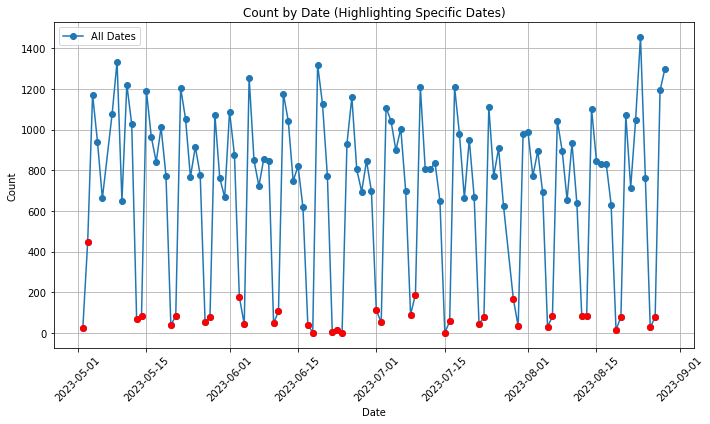

In [26]:
# Given code
df_date = merged_df
df_date_count = df_date.groupby('DATE').size().reset_index(name='Count')

# Convert 'DATE' column to datetime for comparison
df_date_count['DATE'] = pd.to_datetime(df_date_count['DATE'])

# Define specific dates
specific_dates = pd.to_datetime(['2023-05-02', '2023-05-03', '2023-05-07', '2023-05-13', '2023-05-14', '2023-05-20', '2023-05-21', '2023-05-27', '2023-05-28',
                                 '2023-06-03', '2023-06-04', '2023-06-10', '2023-06-11', '2023-06-17', '2023-06-18', '2023-06-22', '2023-06-23', '2023-06-24', 
                                 '2023-07-01', '2023-07-02', '2023-07-08', '2023-07-09', '2023-07-15', '2023-07-16', '2023-07-22', '2023-07-23', '2023-07-29', '2023-07-30', 
                                 '2023-08-05', '2023-08-06', '2023-08-12', '2023-08-13', '2023-08-19', '2023-08-20', '2023-08-26', '2023-08-27'])

plt.figure(figsize=(10, 6))

# Plot all dates with blue 'o' markers
plt.plot(df_date_count['DATE'], df_date_count['Count'], marker='o', label='All Dates')

# Overlay the red dots for specific dates
for specific_date in specific_dates:
    count = df_date_count[df_date_count['DATE'] == specific_date]['Count'].values
    if len(count) > 0:
        plt.plot(specific_date, count[0], 'ro')

# Adding title, labels, grid, and legend
plt.title('Count by Date (Highlighting Specific Dates)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing for labels
plt.legend()  # Add legend to the plot
plt.show()

Mean: 921.9879518072289
Standard Deviation: 201.5395315562187
Variance: 40618.18277990007


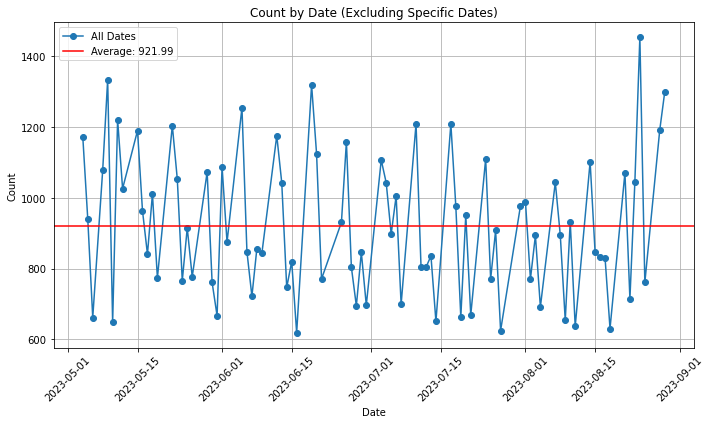

In [23]:
# Given code
df_date = merged_df
df_date_count = df_date.groupby('DATE').size().reset_index(name='Count')

# Convert 'DATE' column to datetime for comparison
df_date_count['DATE'] = pd.to_datetime(df_date_count['DATE'])

# Remove specific dates from df_date_count
specific_dates = pd.to_datetime(['2023-05-02', '2023-05-03', '2023-05-07', '2023-05-13', '2023-05-14', '2023-05-20', '2023-05-21', '2023-05-27', '2023-05-28',
                                 '2023-06-03', '2023-06-04', '2023-06-10', '2023-06-11', '2023-06-17', '2023-06-18', '2023-06-22', '2023-06-23', '2023-06-24', 
                                 '2023-07-01', '2023-07-02', '2023-07-08', '2023-07-09', '2023-07-15', '2023-07-16', '2023-07-22', '2023-07-23', '2023-07-29', '2023-07-30', 
                                 '2023-08-05', '2023-08-06', '2023-08-12', '2023-08-13', '2023-08-19', '2023-08-20', '2023-08-26', '2023-08-27'])
df_date_count = df_date_count[~df_date_count['DATE'].isin(specific_dates)]

# Calculate mean, standard deviation, and variance
mean_count = df_date_count['Count'].mean()
std_dev_count = df_date_count['Count'].std()
variance_count = df_date_count['Count'].var()

# Print calculated values
print("Mean:", mean_count)
print("Standard Deviation:", std_dev_count)
print("Variance:", variance_count)

# Plot a line chart between DATE and Count for the remaining dates
plt.figure(figsize=(10, 6))
plt.plot(df_date_count['DATE'], df_date_count['Count'], marker='o', label='All Dates')

# Adding a horizontal line representing the average
plt.axhline(y=mean_count, color='r', linestyle='-', label=f'Average: {mean_count:.2f}')

# Adding title, labels, grid, and legend
plt.title('Count by Date (Excluding Specific Dates)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing for labels
plt.legend()  # Add legend to the plot
plt.show()

### The standard deviation is 201.539, which is quite high and means that there is more variability in the number of deliveries each day.

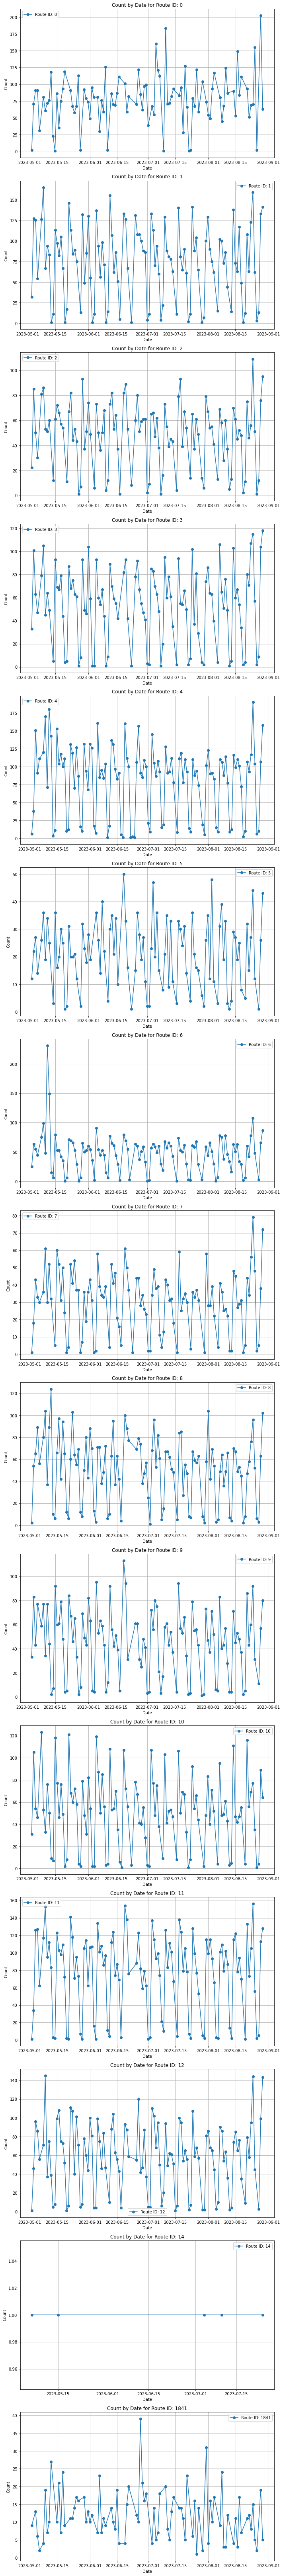

In [27]:
# Groupby Date and RouteID
df_dr = merged_df
df_dr = df_dr.groupby(['DATE', 'ROUTEID']).size().reset_index(name='Count')
# Get unique RouteIDs
unique_route_ids = sorted(df_dr['ROUTEID'].unique())

# Set up the figure and axes
fig, axs = plt.subplots(len(unique_route_ids), figsize=(10, 6*len(unique_route_ids)))

# Loop over each unique and sorted RouteID and plot a line chart
for i, route_id in enumerate(unique_route_ids):
    df_route = df_dr[df_dr['ROUTEID'] == route_id]
    
    axs[i].plot(df_route['DATE'], df_route['Count'], marker='o', label=f'Route ID: {route_id}')
    axs[i].set_title(f'Count by Date for Route ID: {route_id}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [32]:
# Convert the 'DATE' column to datetime if it is not already
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

# Filter the DataFrame for the specific ROUTEID and DATE
filtered_df = merged_df[(merged_df['ROUTEID'] == 5) & (merged_df['DATE'] == '2023-05-05')]

filtered_df = filtered_df[['ROUTEID', 'TRANSID','SENDPOS','CREDATE', 'DISPATCHDATE', 'SIGNDATE', 'DATE', 'combine']]
# Display the filtered DataFrame
filtered_df
# filtered_df.to_csv("2023_05_05_Route5.csv", index=False)

,ROUTEID,TRANSID,SENDPOS,CREDATE,DISPATCHDATE,SIGNDATE,DATE,combine
10332,5,1562831.0,厦门鹭燕大药房有限公司江头分店,2023-05-05 14:45:39,2023/5/7 7:33:38,2023/5/7 21:05:37,2023-05-05,"118.133731,24.499214"
22074,5,2647458.0,厦门市中医院(江头病区药房),2023-05-05 14:19:48,2023/5/6 21:22:42,2023/5/6 21:22:46,2023-05-05,"118.135120,24.498669"
33022,5,1015.0,中医院肝病中心药房,2023-05-05 09:51:13,2023/5/5 14:30:34,2023/5/5 17:24:15,2023-05-05,"118.135120,24.498669"
33023,5,1015.0,中医院肝病中心药房,2023-05-05 15:12:39,2023/5/6 14:41:36,2023/5/6 21:23:54,2023-05-05,"118.135120,24.498669"
33035,5,1015.0,中医院肝病中心药房,2023-05-05 09:35:23,2023/5/5 14:30:34,2023/5/5 17:24:15,2023-05-05,"118.135120,24.498669"
36784,5,35414.0,金尚医院药房（股份厦门）,2023-05-05 17:06:06,2023/5/6 14:41:36,2023/5/6 21:24:09,2023-05-05,"118.143014,24.481641"
41819,5,30514.0,厦门市中医院（江头分部）,2023-05-05 10:33:52,2023/5/5 17:59:12,2023/5/5 18:00:47,2023-05-05,"118.135120,24.498669"
41825,5,30514.0,厦门市中医院（江头分部）,2023-05-05 11:06:42,2023/5/5 17:59:16,2023/5/5 18:00:47,2023-05-05,"118.135120,24.498669"
41826,5,30514.0,厦门市中医院（江头分部）,2023-05-05 11:25:34,2023/5/5 18:00:28,2023/5/5 18:00:47,2023-05-05,"118.135120,24.498669"
41827,5,30514.0,厦门市中医院（江头分部）,2023-05-05 12:55:03,2023/5/5 18:00:25,2023/5/5 18:00:47,2023-05-05,"118.135120,24.498669"


In [15]:
# Count DISPATCHDATE
date_counts = df_date.groupby('DISPATCHDATE').size().reset_index(name='Count')
date_counts = date_counts.sort_values(by='DISPATCHDATE')
top_25 = date_counts.sort_values(by='Count', ascending=False).head(25)
top_25

,DISPATCHDATE,Count
2215,2023-05-27 09:56:56,115
2224,2023-05-27 12:41:03,65
2221,2023-05-27 12:40:15,65
7206,2023-07-18 17:18:06,53
2229,2023-05-27 16:53:23,51
294,2023-05-07 07:27:27,51
2204,2023-05-27 07:50:21,50
2203,2023-05-27 07:43:45,45
3009,2023-06-06 07:37:03,44
140,2023-05-05 17:58:39,43


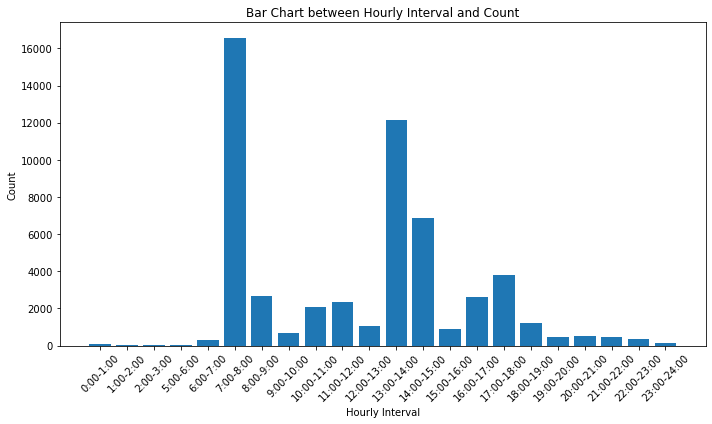

In [17]:
# Extract the hour from 'DISPATCHDATE' and create an hourly interval
df_date['HourlyInterval'] = df_date['DISPATCHDATE'].dt.hour

# Group by 'HourlyInterval' and count the number of occurrences of each interval
hourly_counts = df_date.groupby('HourlyInterval').size().reset_index(name='Count')

# Sort the result by 'HourlyInterval'
hourly_counts = hourly_counts.sort_values(by='HourlyInterval')

# Define the x-axis labels as hourly intervals
x_labels = [f'{hour}:00-{hour+1}:00' for hour in hourly_counts['HourlyInterval']]

# Plotting
plt.figure(figsize=(10,6))
plt.bar(x_labels, hourly_counts['Count'])
plt.xlabel('Hourly Interval')
plt.ylabel('Count')
plt.title('Bar Chart between Hourly Interval and Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
# Count TRANSID
grouped_df = df_date.groupby(['TRANSID', 'SENDPOS']).size().reset_index(name='Count')
top_25 = grouped_df.sort_values(by='Count', ascending=False).head(25)
top_25

,TRANSID,SENDPOS,Count
554,30550.0,厦门市中医院(总院中药房),718
260,1040.0,长庚药库,716
456,20177.0,鹭燕医药股份有限公司湖里门市部（HLMS）,582
844,910293.0,厦门弘爱医院（股份厦门）,522
384,12812.0,滨南分店,468
6,20.0,厦门市第二医院(集美院区),433
391,12834.0,镇海路分店（第一医院旁）,423
132,548.0,中山医院药库,422
970,1486931.0,五缘湾院区药库,388
889,1179167.0,门诊药房,347


In [4]:
# Analysis duration all stores in XiaMen, make a duration cluster, maybe center will be the 物流中心
df_cl = merged_df
grouped_data = df_cl.groupby('TRANSID').agg(
    Average_Duration=('DURATION', 'mean'),
    Combine=('combine', 'first')
).reset_index()

grouped_data

,TRANSID,Average_Duration,Combine
0,8.0,120.950000,"118.096711,24.574396"
1,9.0,114.088889,"118.034349,24.627107"
2,16.0,0.550000,"118.140663,24.669144"
3,17.0,221.216667,"118.092964,24.493268"
4,18.0,324.628226,"118.159369,24.511892"
...,...,...,...
2392,3405175.0,224.900000,"118.010242,24.534007"
2393,3405497.0,153.250000,"117.955173,24.523522"
2394,3405515.0,1742.400000,"118.177223,24.510531"
2395,3405536.0,753.341667,"118.076815,24.465291"
